Bu projede household_power_consumption.csv adlı veri setini seçmemin birkaç önemli nedeni var:

* Gerçek hayatta karşılığı olan bir konu:

    Elektrik tüketimi, özellikle günümüzde enerji tasarrufu ve sürdürülebilirlik açısından çok önemli bir konu. Bu veri seti, bir evin dakika bazında enerji kullanım verilerini içeriyor. Böylece günlük yaşantımıza yakın bir problemi veriyle analiz edebilme şansı veriyor.

* Zengin ve anlamlı sütunlar:

    İçinde aktif güç, voltaj, akım gibi birçok farklı özellik var. Bu da bize hem özellik seçimi (PCA, SelectKBest, LDA gibi) hem de farklı modeller üzerinde çalışma fırsatı sunuyor. Ayrıca zaman bilgisi de olduğu için zaman temelli analizler de yapılabiliyor.

* Eksik ve düzensiz veriler sayesinde önişleme uygulama şansı:

    Verinin içinde "?" gibi eksik değerler var. Bu da bize eksik veri doldurma, dönüştürme ve temizleme işlemlerini yapma imkanı sağlıyor. Böylece derslerde öğrendiğimiz veri ön işleme adımlarını gerçek bir veri üzerinden uygulayabiliyoruz.

* Kamuya açık ve etik bir veri seti:

    Herkesin erişebileceği açık kaynaklı bir veri seti olduğu için kullanmakta bir sakınca yok. İçinde kişisel bilgi de bulunmuyor.

Bu nedenlerle, hem anlamlı hem de teknik açıdan uygun olduğu için bu veri setini seçildi

In [36]:
import pandas as pd

# Dosya yolu
file_path = "/content/drive/MyDrive/24-25 BIM 322 Makine Öğrenmesi/Proje/household_power_consumption.csv"

# Veriyi oku, eksik değerler '?' olarak kodlandığı için na_values ile belirt
df = pd.read_csv(file_path, sep=';', na_values='?')

# Tarih ve saat sütunlarını birleştirerek datetime sütunu oluştur
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S", errors='coerce')

# Sayısal sütunları float türüne dönüştür
num_cols = [
    "Global_active_power", "Global_reactive_power", "Voltage",
    "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"
]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Verinin genel yapısını inceleyelim
df_info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 158.3+ MB


In [37]:

df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [38]:
missing_values = df.isnull().sum()
print(missing_values)

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64


In [39]:
# Eksik değerleri her sütunun ortalaması ile doldur
df_filled = df.copy()
df_filled[num_cols] = df_filled[num_cols].fillna(df_filled[num_cols].mean())
df_filled.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [40]:
# Eksik değer kontrolü sonrası doğrulama
missing_after_fill = df_filled[num_cols].isnull().sum()
missing_after_fill

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [41]:
# MinMax normalizasyonu elle uygulayalım
df_normalized = df_filled.copy()
for col in num_cols:
    min_val = df_normalized[col].min()
    max_val = df_normalized[col].max()
    df_normalized[col] = (df_normalized[col] - min_val) / (max_val - min_val)

# Hedef değişken tanımla: aktif güç > ortalama ise 1, değilse 0
mean_power = df_normalized["Global_active_power"].mean()
df_normalized["Target"] = (df_normalized["Global_active_power"] > mean_power).astype(int)

# Kontrol: normalize edilmiş veri + hedef sütunu
df_normalized[[*num_cols, "Target"]].head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Target
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,1
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,1
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,1
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,1
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,1


In [48]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = df_normalized[["Global_active_power", "Global_reactive_power", "Voltage",
                   "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]]
y = df_normalized["Target"]




In [49]:
pca = PCA(n_components=5)  # veya otomatik seçmek için: n_components = 0.95
X_pca = pca.fit_transform(X)

print("PCA bileşen şekli:", X_pca.shape)
print("PCA ile açıklanan toplam varyans:", sum(pca.explained_variance_ratio_))


PCA bileşen şekli: (2075259, 5)
PCA ile açıklanan toplam varyans: 0.9847270593042692


In [50]:
lda = LDA(n_components=1)  # İkili sınıf olduğu için 1
X_lda = lda.fit_transform(X, y)

print("LDA bileşen şekli:", X_lda.shape)


LDA bileşen şekli: (2075259, 1)


In [51]:
skb = SelectKBest(score_func=f_classif, k=5)
X_skb = skb.fit_transform(X, y)

# Seçilen sütun isimleri
skb_features = X.columns[skb.get_support()]
print("SelectKBest ile seçilen özellikler:", list(skb_features))


SelectKBest ile seçilen özellikler: ['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_3']


In [64]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Özellik ve hedef
X = df_normalized[["Global_active_power", "Global_reactive_power", "Voltage",
                   "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]]
y = df_normalized["Target"]

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
joblib.dump(pca, "pkl_models/PCA_selector.pkl")

# Eğitim/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# --- 1. k-NN ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
joblib.dump(knn, "pkl_models/KNN_PCA.pkl")
print("k-NN Accuracy (PCA):", accuracy_score(y_test, knn.predict(X_test)))

# --- 2. Naive Bayes ---
nb = GaussianNB()
nb.fit(X_train, y_train)
joblib.dump(nb, "pkl_models/NaiveBayes_PCA.pkl")
print("Naive Bayes Accuracy (PCA):", accuracy_score(y_test, nb.predict(X_test)))

# --- 3. Yapay Sinir Ağı (MLP) ---
ann = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
ann.fit(X_train, y_train)
joblib.dump(ann, "pkl_models/MLP_PCA.pkl")
print("Yapay Sinir Ağı Accuracy (PCA):", accuracy_score(y_test, ann.predict(X_test)))

# --- 4. XGBoost ---
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
joblib.dump(xgb, "pkl_models/XGBoost_PCA.pkl")
print("XGBoost Accuracy (PCA):", accuracy_score(y_test, xgb.predict(X_test)))


k-NN Accuracy (PCA): 0.9969867229487711
Naive Bayes Accuracy (PCA): 0.9357205040974785
Yapay Sinir Ağı Accuracy (PCA): 0.997267812225938
XGBoost Accuracy (PCA): 0.9972099881460637


In [65]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

# Özellik ve hedef
X = df_normalized[["Global_active_power", "Global_reactive_power", "Voltage",
                   "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]]
y = df_normalized["Target"]

# SelectKBest
skb = SelectKBest(score_func=f_classif, k=5)
X_skb = skb.fit_transform(X, y)
joblib.dump(skb, "pkl_models/SelectKBest_selector.pkl")

skb_features = X.columns[skb.get_support()]
print("SelectKBest ile seçilen özellikler:", list(skb_features))

# Eğitim/test
X_train, X_test, y_train, y_test = train_test_split(X_skb, y, test_size=0.3, random_state=42)

# --- 1. k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
joblib.dump(knn, "pkl_models/KNN_SelectKBest.pkl")
print("k-NN Accuracy (SelectKBest):", accuracy_score(y_test, knn.predict(X_test)))

# --- 2. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
joblib.dump(nb, "pkl_models/NaiveBayes_SelectKBest.pkl")
print("Naive Bayes Accuracy (SelectKBest):", accuracy_score(y_test, nb.predict(X_test)))

# --- 3. Yapay Sinir Ağı
ann = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
ann.fit(X_train, y_train)
joblib.dump(ann, "pkl_models/MLP_SelectKBest.pkl")
print("Yapay Sinir Ağı Accuracy (SelectKBest):", accuracy_score(y_test, ann.predict(X_test)))

# --- 4. XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
joblib.dump(xgb, "pkl_models/XGBoost_SelectKBest.pkl")
print("XGBoost Accuracy (SelectKBest):", accuracy_score(y_test, xgb.predict(X_test)))


SelectKBest ile seçilen özellikler: ['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_3']
k-NN Accuracy (SelectKBest): 0.9989704101333488
Naive Bayes Accuracy (SelectKBest): 0.967403281195288
Yapay Sinir Ağı Accuracy (SelectKBest): 0.9993334168570043
XGBoost Accuracy (SelectKBest): 1.0


In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Özellik ve hedef belirle
X = df_normalized[["Global_active_power", "Global_reactive_power", "Voltage",
               "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]]
y = df_normalized["Target"]

# --- LDA dönüşümü (ikili sınıf olduğu için en fazla 1 bileşen)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
joblib.dump(skb, "pkl_models/LDA_selector.pkl")

# --- Eğitim/Test ayır
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

# --- 1. k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
joblib.dump(lda, "pkl_models/KNN_LDA.pkl")
y_pred_knn = knn.predict(X_test)
print("k-NN Accuracy (LDA):", accuracy_score(y_test, y_pred_knn))

# --- 2. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
joblib.dump(lda, "pkl_models/NaiveBayes_LDA.pkl")
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy (LDA):", accuracy_score(y_test, y_pred_nb))

# --- 3. Yapay Sinir Ağı
ann = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
ann.fit(X_train, y_train)
joblib.dump(lda, "pkl_models/MLP_LDA.pkl")
y_pred_ann = ann.predict(X_test)
print("Yapay Sinir Ağı Accuracy (LDA):", accuracy_score(y_test, y_pred_ann))

# --- 4. XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
joblib.dump(lda, "pkl_models/XGBoost_LDA.pkl")
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy (LDA):", accuracy_score(y_test, y_pred_xgb))


k-NN Accuracy (LDA): 0.9723247528823697
Naive Bayes Accuracy (LDA): 0.9617670396319818
Yapay Sinir Ağı Accuracy (LDA): 0.9726508164438833
XGBoost Accuracy (LDA): 0.9745381301620037


12 Modellik Doğruluk Tablosu:


,k-NN,Naive Bayes,ANN,XGBoost
PCA,0.996987,0.935721,0.997268,0.997210
SelectKBest,0.998970,0.967403,0.999333,1.000000
LDA,0.972325,0.961767,0.972651,0.974538


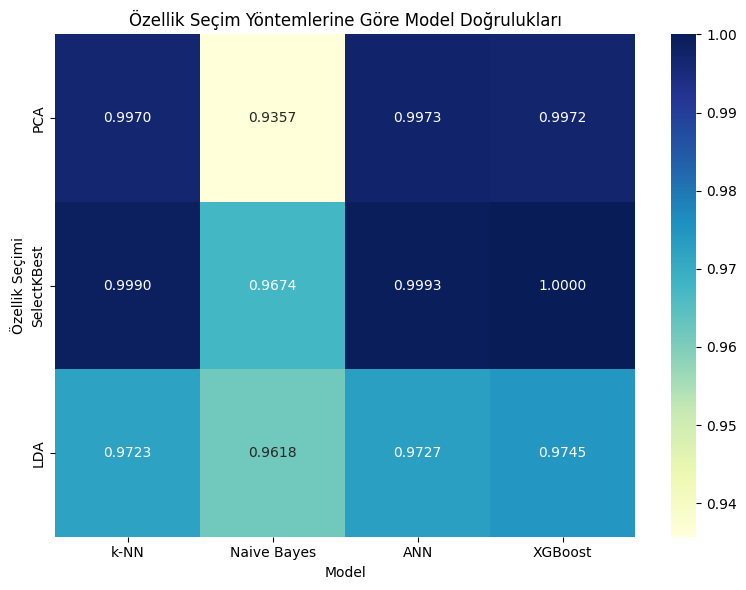

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manuel olarak elde edilen doğruluk oranlarını buraya girin
results = {
    "PCA": {
        "k-NN": 0.9969867229487711,
        "Naive Bayes": 0.9357205040974785,
        "ANN": 0.997267812225938,
        "XGBoost": 0.9972099881460637
    },
    "SelectKBest": {
        "k-NN": 0.9989704101333488,
        "Naive Bayes": 0.967403281195288,
        "ANN": 0.9993334168570043,
        "XGBoost": 1.0
    },
    "LDA": {
        "k-NN": 0.9723247528823697,
        "Naive Bayes": 0.9617670396319818,
        "ANN": 0.9726508164438833,
        "XGBoost": 0.9745381301620037
    }
}

# Veriyi DataFrame'e çevir
df_results = pd.DataFrame(results).T  # Transpose ile model tipi sütunlara geçti
print("12 Modellik Doğruluk Tablosu:")
display(df_results)

# Görselleştirme (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(df_results, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Özellik Seçim Yöntemlerine Göre Model Doğrulukları")
plt.ylabel("Özellik Seçimi")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


In [59]:
import pandas as pd
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# --- 1. VERİ SETİ YÜKLE ---
df = pd.read_csv("/content/drive/MyDrive/24-25 BIM 322 Makine Öğrenmesi/Proje/household_power_consumption.csv", sep=';', na_values='?')
df.dropna(inplace=True)

for col in ["Global_active_power", "Global_reactive_power", "Voltage",
            "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df['Target'] = (df['Global_active_power'] > df['Global_active_power'].median()).astype(int)

X = df[["Global_active_power", "Global_reactive_power", "Voltage",
        "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]]
y = df["Target"]

# --- 2. VERİYİ AYIR ve STANDARDİZE ET ---
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# --- 3. SEÇİCİLER ve MODELLER ---
selectors = {
    "PCA": PCA(n_components=5),
    "SelectKBest": SelectKBest(score_func=f_classif, k=5),
    "LDA": LDA(n_components=1)
}

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "NaiveBayes": GaussianNB(),
    "MLP": MLPClassifier(max_iter=300),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# --- 4. KAYDETME KLASÖRÜ ---
os.makedirs("pkl_models", exist_ok=True)

# --- 5. MODEL ve SELECTOR KOMBİNASYONLARI KAYDET ---
for sel_name, selector in selectors.items():
    X_sel = selector.fit_transform(X_train_scaled, y_train)
    selector_path = f"pkl_models/{sel_name}_selector.pkl"
    joblib.dump(selector, selector_path)

    for model_name, model in models.items():
        model.fit(X_sel, y_train)
        model_path = f"pkl_models/{model_name}_{sel_name}.pkl"
        joblib.dump(model, model_path)

print("Tüm .pkl dosyaları 'pkl_models' klasörüne kaydedildi.")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:54:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:57:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tüm .pkl dosyaları 'pkl_models' klasörüne kaydedildi.
